In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
letters = pd.read_csv('letter-recognition.csv')

In [4]:
# about the dataset

# dimensions
print("Dimensions: ", letters.shape, "\n")

# data types
print(letters.info())

# head
letters.head()

Dimensions:  (20000, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
letters.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [6]:
# there is space in end of column name e.g 'xbox '

In [7]:
letters.columns=['letter', 'xbox', 'ybox', 'width', 'height', 'onpix ', 'xbar ',
       'ybar', 'x2bar', 'y2bar ', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge ', 'yedgex']

In [8]:
letters.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix ', 'xbar ', 'ybar',
       'x2bar', 'y2bar ', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge ', 'yedgex'],
      dtype='object')

In [9]:
letters.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

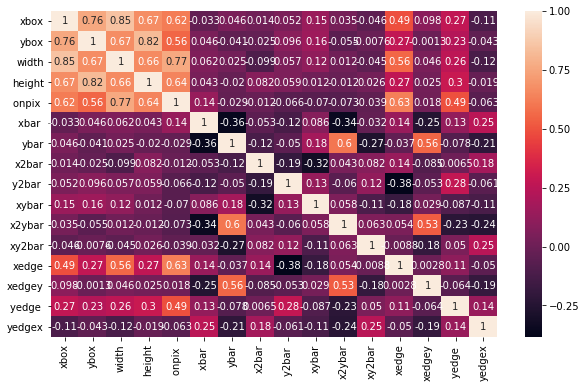

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(letters.corr(), annot=True)

In [11]:
letter_order = list(np.sort(letters['letter'].unique()))

In [12]:
print(letter_order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [13]:
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


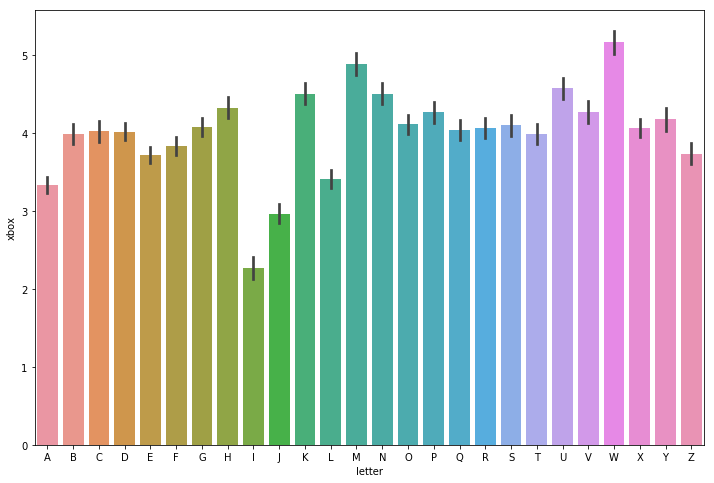

In [14]:
#basic plots: How do various attributes vary with the letters
plt.figure(figsize=(12,8))
sns.barplot(data=letters, x="letter", y='xbox', order=letter_order )

In [15]:
letter_mean = letters.groupby('letter').mean()

In [16]:
letter_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


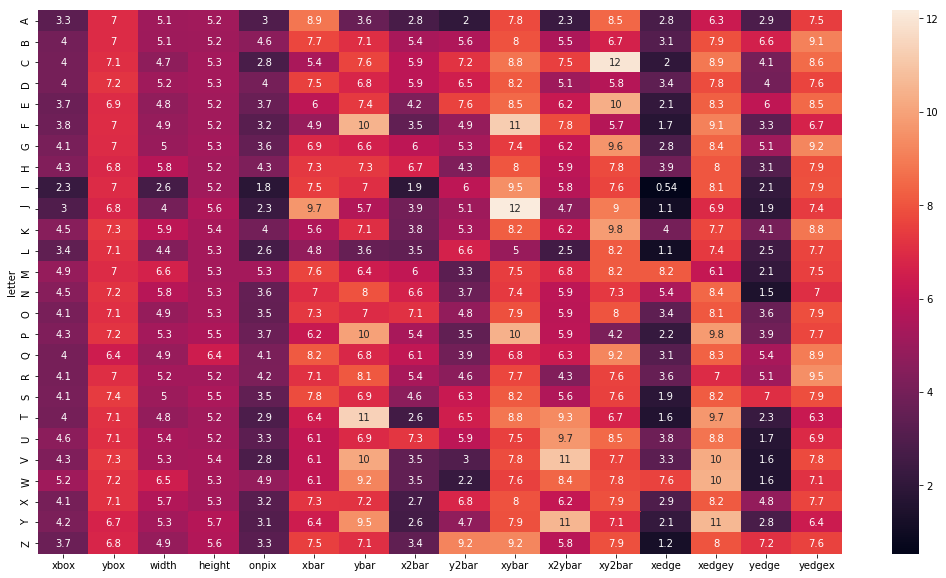

In [17]:

plt.figure(figsize=(18, 10))
sns.heatmap(letter_mean, annot=True)

In [18]:
averager_value=round(letters.drop(['letter'], axis=1).mean(),2)

In [19]:
averager_value

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [20]:
# let scale them

In [21]:
X = letters.drop(['letter'], axis=1)

In [22]:
y = letters['letter']

In [23]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
X_scaled

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [27]:
from sklearn.svm import SVC

In [28]:
linear_model = SVC(kernel='linear')

In [29]:
linear_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = linear_model.predict(X_test)

In [31]:
# confusion matrix and accuracy
from sklearn import metrics
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cmA
print("Confusion metrics: \n", metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8523333333333334 

Confusion metrics: 
 [[198   0   0   0   0   0   1   1   0   1   1   1   0   0   0   0   0   1
    0   1   1   0   0   0   3   0]
 [  0 188   0   3   0   1   3   3   1   0   1   0   0   2   0   1   1   9
    3   0   0   1   0   1   0   0]
 [  1   0 200   0   7   0  12   1   0   0   5   0   0   0   3   0   0   0
    0   0   1   0   0   0   0   0]
 [  1  15   0 210   0   1   2   2   1   0   1   0   1   5   3   0   0   5
    0   1   0   0   0   0   0   0]
 [  0   1   3   0 204   2   6   1   0   0   1   5   0   0   0   0   2   2
    1   2   0   0   0   1   0   3]
 [  0   0   0   1   1 201   1   2   1   1   0   0   0   2   0   2   0   0
    3   7   1   0   1   0   1   0]
 [  0   1   9   4   2   2 167   1   0   1   4   3   1   0   1   0   9   1
    8   0   0   2   3   0   0   0]
 [  0   7   3  11   0   4   3 141   0   2   4   1   2   0  12   0   4  12
    0   0   4   2   0   4   1   0]
 [  0   0   2   3   0   6   0   0 184   9   0   0   0   0   1   0   0   0
  

The linear model gives approx. 85% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [33]:
non_linear_model = SVC(kernel='rbf')

In [34]:
non_linear_model.fit(X_train, y_train)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = non_linear_model.predict(X_test)

In [37]:
# confusion matrix and accuracy
from sklearn import metrics
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cmA
print("Confusion metrics: \n", metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9383333333333334 

Confusion metrics: 
 [[205   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2   0]
 [  0 205   0   3   1   0   1   0   0   0   0   0   0   0   0   0   0   6
    1   0   0   0   0   1   0   0]
 [  0   0 213   0   5   0   7   1   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   4   0 234   0   0   1   3   0   0   0   0   0   3   1   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 221   1   9   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   2]
 [  0   0   0   1   0 215   1   1   1   0   0   0   0   1   0   1   0   0
    1   3   0   0   0   0   0   0]
 [  0   0   3   4   1   1 202   0   0   0   0   1   1   0   2   0   0   1
    0   0   0   1   2   0   0   0]
 [  0   7   0   5   0   0   4 177   0   0   2   0   1   0   3   0   4  13
    0   0   1   0   0   0   0   0]
 [  0   0   1   1   0   3   0   0 194  11   0   0   0   0   0   1   0   0
  

The non-linear model gives approx. 93% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

# Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [38]:
from sklearn.model_selection import KFold, cross_val_score

In [39]:
folds = KFold(n_splits=5, shuffle=True, random_state=101)

In [40]:
cross_score = cross_val_score(SVC(kernel='rbf'), X_train, y_train, cv=folds, n_jobs=-1, verbose=4)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s finished


In [41]:
cross_score

array([0.93535714, 0.93321429, 0.92285714, 0.9375    , 0.93607143])

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
non_linear_kernal2 = SVC(kernel='rbf')

In [48]:
hyper_param = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.1, 0.01, 0.001]}

In [50]:
grid_cv = GridSearchCV(non_linear_kernal2, param_grid=hyper_param, cv=folds, scoring='accuracy',
                       n_jobs=-1, verbose=1)

In [51]:
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  6.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [53]:
grid_cv_result = pd.DataFrame(grid_cv.cv_results_)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_trai

In [54]:
grid_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.757110,0.020405,3.345928,0.219783,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.838929,0.841071,0.837500,...,0.840643,0.002148,10,0.859554,0.859107,0.860714,0.856518,0.858839,0.858946,0.001373
1,12.818157,0.310617,3.957685,0.443273,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.681429,0.670714,0.674286,...,0.672643,0.005888,14,0.674464,0.678304,0.684643,0.675893,0.684554,0.679571,0.004284
2,23.003311,0.160045,3.953832,0.229850,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.200357,0.203214,0.203571,...,0.212000,0.012140,15,0.208482,0.216518,0.225357,0.235446,0.230446,0.223250,0.009679
3,5.446970,0.192420,2.254048,0.120096,1,0.1,"{'C': 1, 'gamma': 0.1}",0.949643,0.948929,0.940000,...,0.948000,0.004156,5,0.970625,0.970982,0.970268,0.971518,0.968839,0.970446,0.000904
4,5.674488,0.080765,2.921308,0.212825,1,0.01,"{'C': 1, 'gamma': 0.01}",0.826429,0.834643,0.828571,...,0.832714,0.006221,11,0.843929,0.844196,0.847679,0.843571,0.844018,0.844679,0.001514
5,12.021503,0.264561,3.615850,0.165237,1,0.001,"{'C': 1, 'gamma': 0.001}",0.684643,0.672500,0.682500,...,0.677214,0.005622,13,0.682054,0.683125,0.687946,0.679554,0.686429,0.683821,0.003021
6,5.229684,0.048626,1.992078,0.145566,10,0.1,"{'C': 10, 'gamma': 0.1}",0.970357,0.968571,0.965714,...,0.969071,0.002561,1,0.997321,0.997679,0.997500,0.997321,0.997589,0.997482,0.000143
7,3.882302,0.100113,2.032605,0.071068,10,0.01,"{'C': 10, 'gamma': 0.01}",0.914643,0.908571,0.902500,...,0.911214,0.005654,7,0.929643,0.929464,0.930357,0.928929,0.928125,0.929304,0.000746
8,5.700326,0.140016,3.054276,0.212589,10,0.001,"{'C': 10, 'gamma': 0.001}",0.805714,0.809643,0.803571,...,0.808929,0.006227,12,0.818125,0.817679,0.819643,0.814375,0.819464,0.817857,0.001897
9,5.369513,0.168085,2.006212,0.147361,100,0.1,"{'C': 100, 'gamma': 0.1}",0.970000,0.969643,0.962857,...,0.967857,0.003089,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


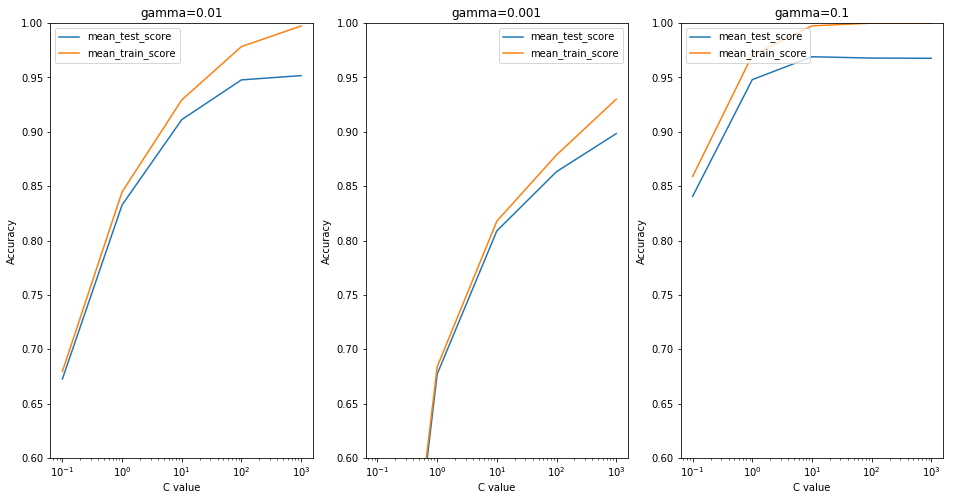

In [71]:
plt.figure(figsize=(16,8))
plt.subplot(131)
gamma_1 = grid_cv_result[grid_cv_result['param_gamma']==0.01]
plt.plot(gamma_1['param_C'], gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'], gamma_1['mean_train_score'])
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('gamma=0.01')
plt.ylim([0.60,1])
plt.legend(['mean_test_score', 'mean_train_score'], loc='best')


plt.subplot(132)
gamma_1 = grid_cv_result[grid_cv_result['param_gamma']==0.001]
plt.plot(gamma_1['param_C'], gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'], gamma_1['mean_train_score'])
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('gamma=0.001')
plt.ylim([0.60,1])
plt.legend(['mean_test_score', 'mean_train_score'], loc='best')


plt.subplot(133)
gamma_1 = grid_cv_result[grid_cv_result['param_gamma']==0.1]
plt.plot(gamma_1['param_C'], gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'], gamma_1['mean_train_score'])
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('gamma=0.1')
plt.ylim([0.60,1])
plt.legend(['mean_test_score', 'mean_train_score'], loc='upper left')

The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

In [74]:
# printing the optimal accuracy score and hyperparameters
best_score = grid_cv.best_score_
best_hyperparams = grid_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9690714285714286 corresponding to hyperparameters {'C': 10, 'gamma': 0.1}


# Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [75]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.1, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9706666666666667 

[[208   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 213   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3
    0   0   0   1   0   0   0   0]
 [  0   0 225   0   1   0   2   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 240   0   0   1   1   0   2   0   0   0   2   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   3   0 223   1   3   0   0   0   0   0   0   0   0   1   0   0
    1   0   0   0   0   0   0   2]
 [  0   0   0   1   0 217   0   1   1   0   0   0   0   0   0   3   0   0
    0   1   0   1   0   0   0   0]
 [  0   0   2   2   1   0 209   0   0   0   0   0   1   0   1   0   0   0
    0   0   1   1   1   0   0   0]
 [  0   1   2   3   0   0   1 200   0   1   2   0   1   0   1   0   2   2
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 205   9   0   0   0   0   0   0   0   0
    0   0   0   0   0   

## Conclusion

The accuracy achieved using a non-linear kernel  is mush higher than that of a linear one. We can conclude that the problem is highly non-linear in nature.